In [1]:
install.packages("RCurl", repos='http://cran.us.r-project.org')
install.packages("stargazer", repos='http://cran.us.r-project.org')
install.packages("fredr", repos='http://cran.us.r-project.org')
install.packages("tidyr", repos='http://cran.us.r-project.org')
install.packages("PASWR2", repos='http://cran.us.r-project.org')
install.packages("MASS", repos='http://cran.us.r-project.org')
install.packages("repmis", repos='http://cran.us.r-project.org')
install.packages("latex2exp", repos='http://cran.us.r-project.org')
install.packages("dplyr", repos='http://cran.us.r-project.org')
install.packages("ggplot2", repos='http://cran.us.r-project.org')
install.packages("tidyverse", repos='http://cran.us.r-project.org')
install.packages("haven", repos='http://cran.us.r-project.org')
install.packages("margins", repos='http://cran.us.r-project.org')
install.packages("caTools", repos='http://cran.us.r-project.org')
install.packages("SDMTools", repos='http://cran.us.r-project.org')
install.packages("caret", repos='http://cran.us.r-project.org')
install.packages("randomForest", repos='http://cran.us.r-project.org')

package 'RCurl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoonl\AppData\Local\Temp\RtmpOAHsPv\downloaded_packages
package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoonl\AppData\Local\Temp\RtmpOAHsPv\downloaded_packages
package 'fredr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoonl\AppData\Local\Temp\RtmpOAHsPv\downloaded_packages
package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoonl\AppData\Local\Temp\RtmpOAHsPv\downloaded_packages
package 'PASWR2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoonl\AppData\Local\Temp\RtmpOAHsPv\downloaded_packages
package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoonl\AppData\Local\Temp\RtmpOAHsPv\downloaded_packages
package 'rep

Warning message:
"package 'SDMTools' is not available (for R version 3.6.1)"

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoonl\AppData\Local\Temp\RtmpOAHsPv\downloaded_packages
package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoonl\AppData\Local\Temp\RtmpOAHsPv\downloaded_packages


In [2]:
library(quantmod)
library(stargazer)
library(fredr)
library(tidyr)
library(PASWR2)
library(MASS)
library(repmis)
library(latex2exp)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(RCurl)
library(haven)
library(margins)
library(caTools)
library(SDMTools)
library(caret)
library(randomForest)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Warning message:
"package 'fredr' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'PASWR2' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'MASS' was built u

ERROR: Error in library(SDMTools): there is no package called 'SDMTools'


# Recovery Predictor 
#### RE Date Analysis - Professor Tim Savage

By: Wesley Li, Sen Chen

## Section 1 - Data Set Selection
### We first pulled all the leading indicators we can think of 
#### they are:
#### 1) Yield Curve
Difference between the 10 year and 3 year treasury yield show the <b>risk perception</b> of the market<br>
Yield curve can <b>flatten</b> when investor rush into longer maturity treasuries to avoid short-term market risk<br>
When the flattened or inverted yield curve start to bend back, potentially a <b>recovery/growth period</b> is pending


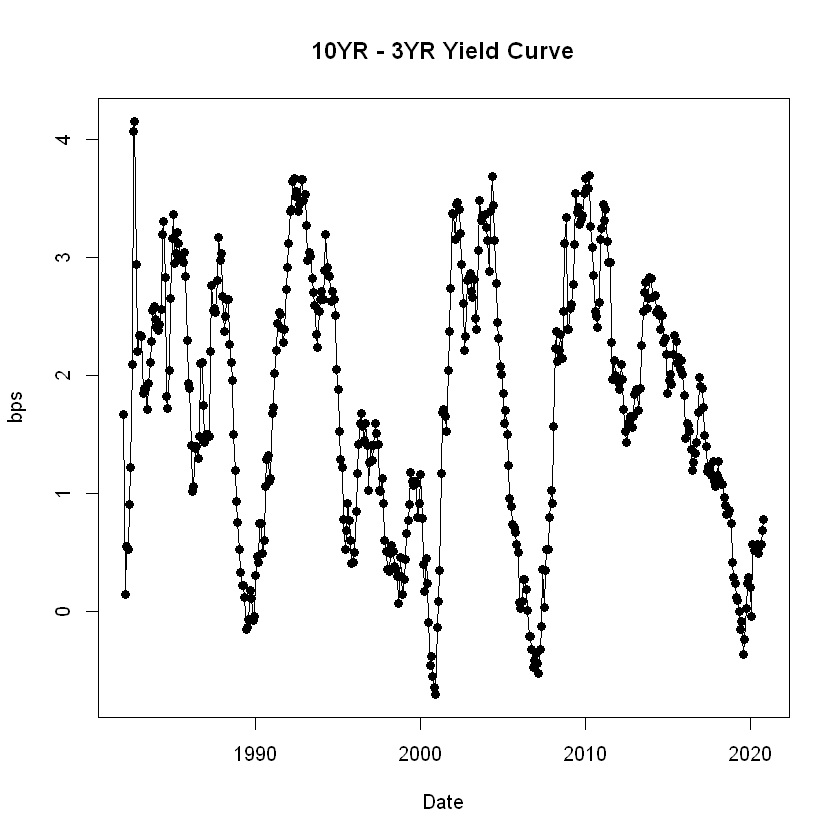

In [3]:
fredr_set_key('637fc784d3d9b76e86174d122a9c1c3d')
yieldcurve = fredr('T10Y3MM')
plot(yieldcurve$date, yieldcurve$value,col='black',main='10YR - 3YR Yield Curve', pch=16,
    xlab='Date',ylab='bps')
lines(yieldcurve$date,yieldcurve$value,col="black")

#### 2) Gross Domestic Product
We expect to see some correlation between the <b>GDP growth rate</b> and the state of recovery, <b>one period lagging GDP</b> could also have correlation with the state of recovery 

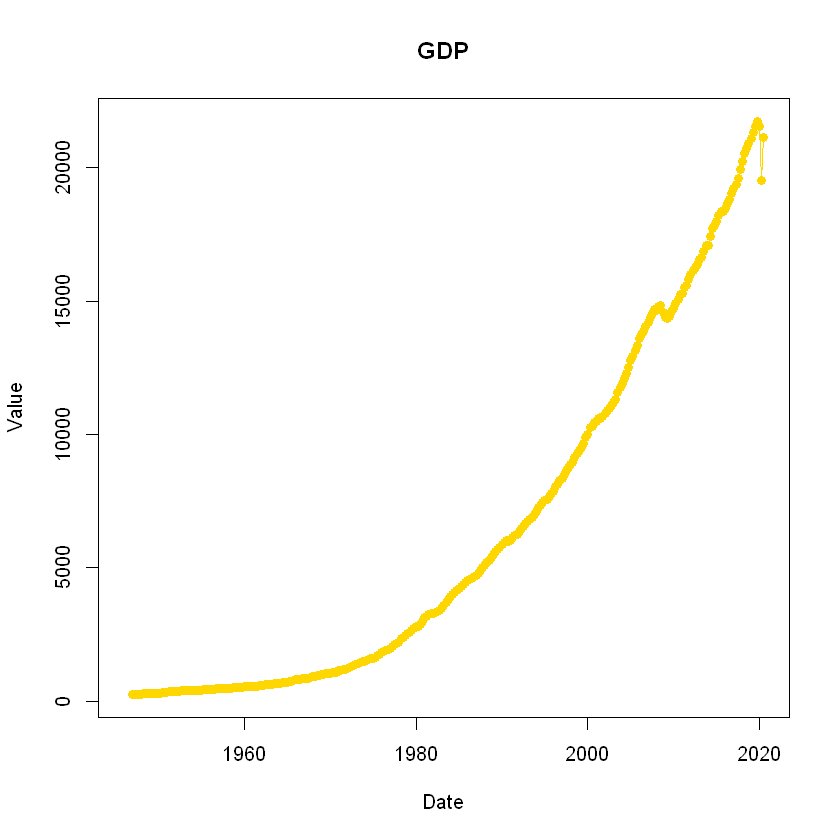

In [4]:
GDP = fredr('GDP')
plot(GDP$date, GDP$value,col='gold',main='GDP', pch=16,
    xlab='Date',ylab='Value')
lines(GDP$date,GDP$value,col="gold")

#### 3) Building Permit
Monthly new building permits issued is an <b>leading indicator</b> to gauge the demand in the real estate market 

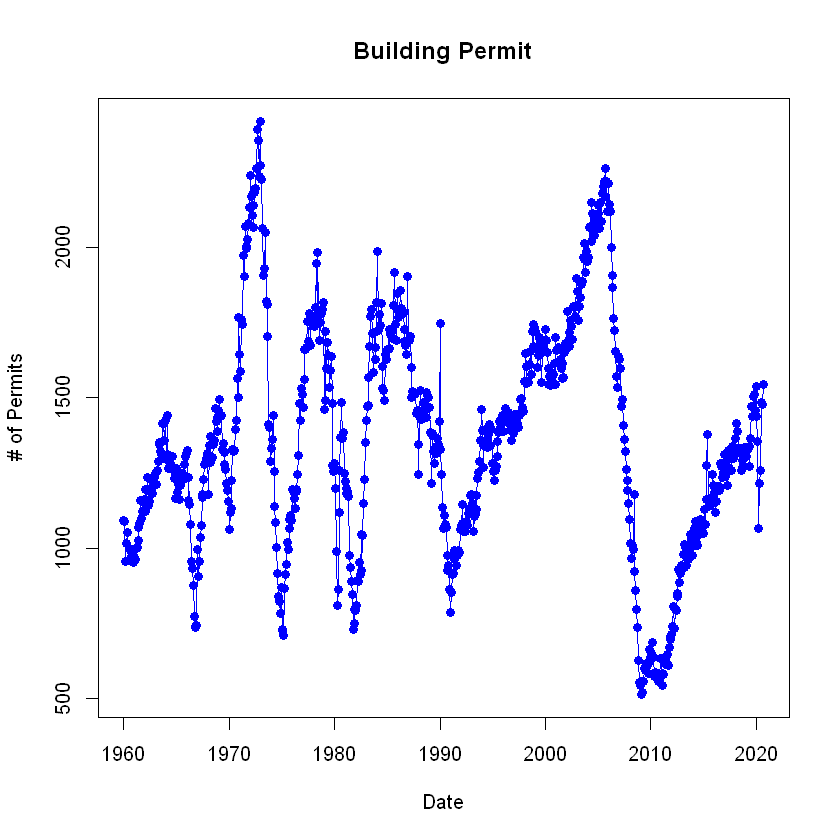

In [5]:
buildingpermit = fredr('PERMIT')
plot(buildingpermit$date, buildingpermit$value,col='blue',main='Building Permit', pch=16,
    xlab='Date',ylab='# of Permits')
lines(buildingpermit$date,buildingpermit$value,col="blue")

#### 4) Moody's AAA Corp Bonds - 10 Year Treasury Credit Spread
This dataset cover the <b>availability of credit</b> in the bond market<br>
Credit Spread typically <b>widens</b> when concerns starts to mount about <b>corporation's ability to meet their debt obligation</b>, which is a real issue during recession<br>
Spread naturally <b>narrows</b> when the macro environment starts to improve

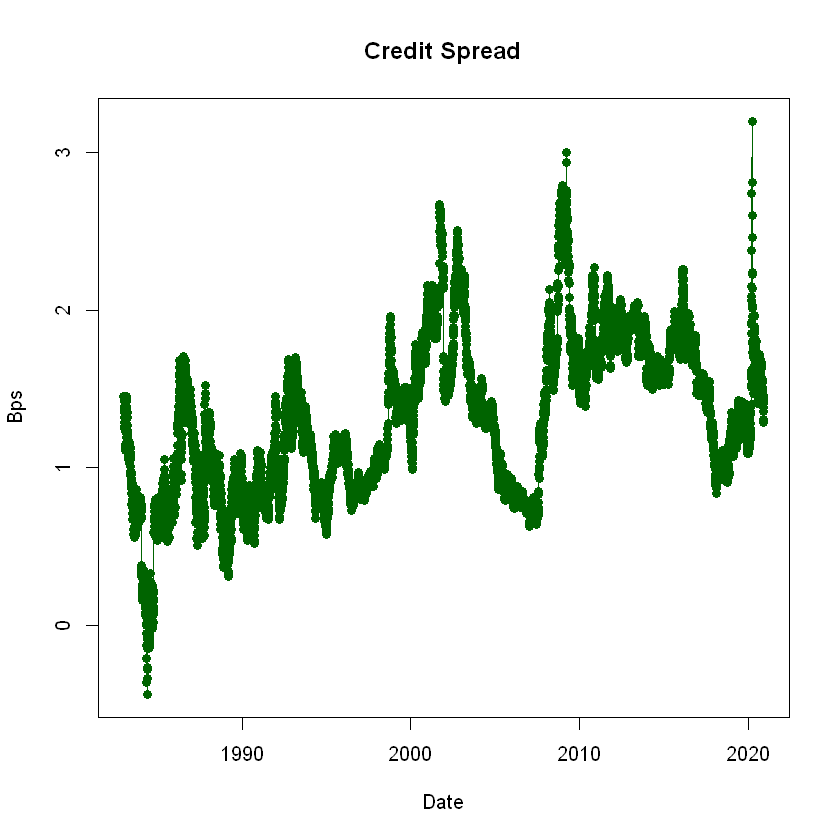

In [6]:
creditspread = fredr('AAA10Y')
plot(creditspread$date, creditspread$value,col='darkgreen',main='Credit Spread', pch=16,
    xlab='Date',ylab='Bps')
lines(creditspread$date,creditspread$value,col="darkgreen")

#### 5) Sectoral Balance
<b>Public Account</b> measures the federal deficits while the <b>Private Account</b> measuures the private savings includes personal as well as corporate

The level of <b>Private Sector</b> savings should to some level reflect the CPI level and the PCE level to certain extend
The level of <b>Public Sector</b> savings or deficit measures the stimulation the government inject into the economy for a given period, this measure is expected to decrease as the economy recovers.

FRED discountinued to publish monthly report on the <b>Foreign Account</b> for Sectoral Balance, however, since three account should net to <b>ZERO</b> two account is sufficient enough for analytical purposes

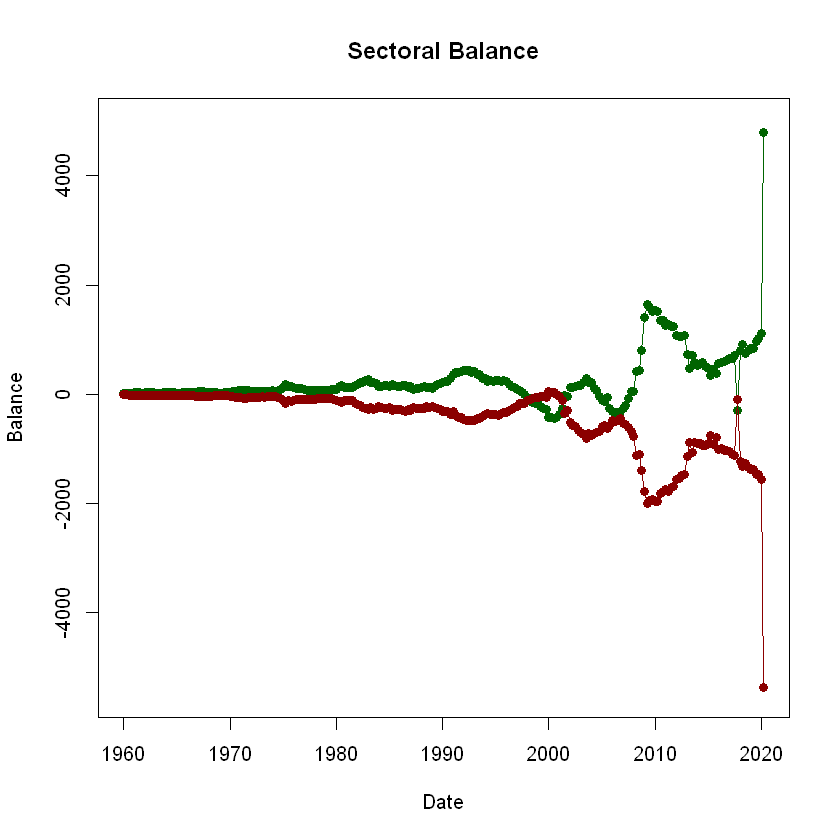

In [7]:
privateacct = fredr('W994RC1Q027SBEA')
publicacct = fredr('AD01RC1Q027SBEA')
a = merge(privateacct,publicacct,by.x='date',by.y='date')
a1 = subset(a, select = c(date,value.x,value.y))
anames = c('Date','Private Acct','Public Acct')
colnames(a1)=anames
plot(a1$Date, a1$`Private Acct`,col='darkgreen',main='Sectoral Balance', pch=16,
     xlab='Date',ylab='Balance',ylim=c(-5500,5000))
lines(a1$Date,a1$`Private Acct`,col="darkgreen")
points(a1$Date,a1$`Public Acct`,pch=16,col='darkred')
lines(a1$Date,a1$`Public Acct`,col='darkred')

#### 6) Effective Federal Fund Rate
FFR directly affect many aspects of the economy, availability of credit, consumer spending behavior, mortgage refinance, to name a few<br>

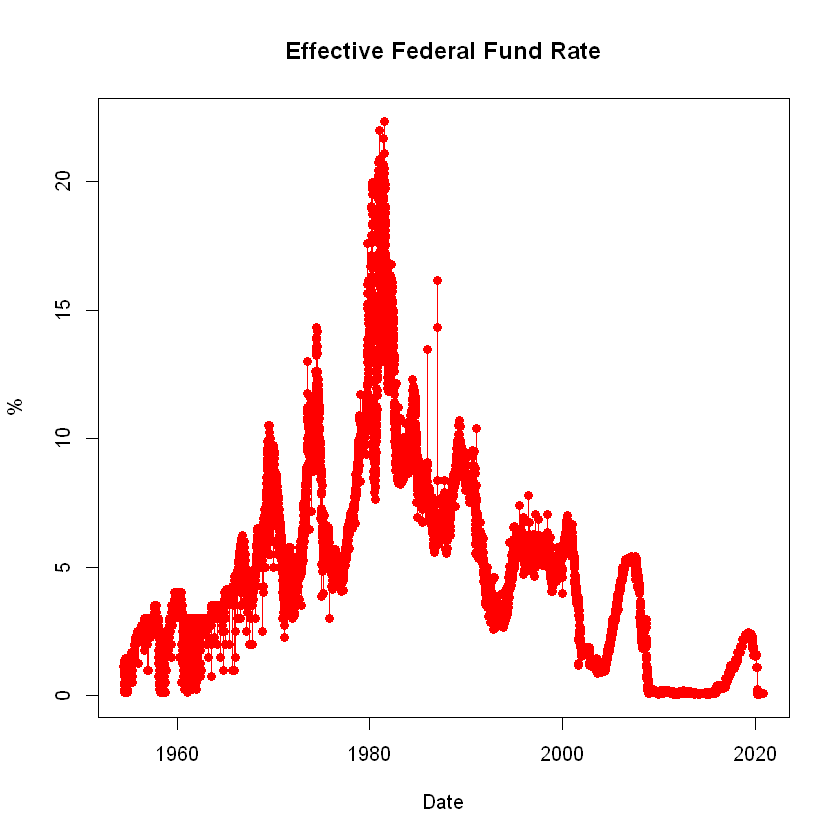

In [8]:
fedfund = fredr('DFF')
plot(fedfund$date, fedfund$value,col='red',main='Effective Federal Fund Rate', pch=16,
    xlab='Date',ylab='%')
lines(fedfund$date,fedfund$value,col="red")

#### 7) Unemployment Rate
It goes without saying that the unemployment rate is one of the most important leading indicators to gauge the state of the economy. <b>More hiring</b> directly translates into <b>more spending</b> (at least in the US economy). We want to see if the level of unemplotment has the same predicative power of a recovery as it does on recession. 

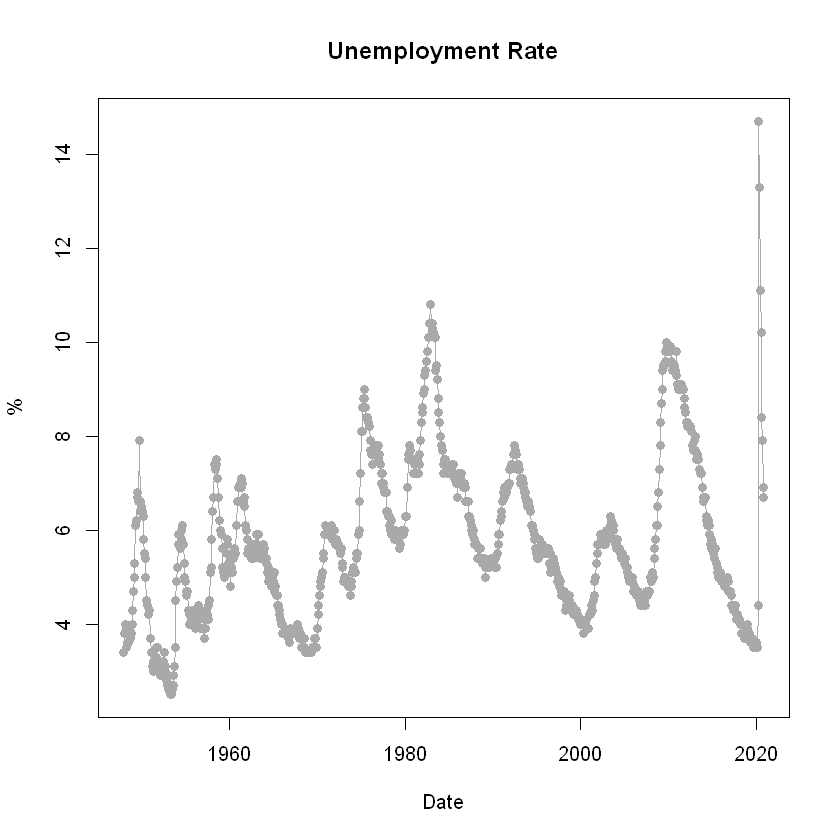

In [9]:
unemployment = fredr('UNRATE')
plot(unemployment$date, unemployment$value,col='darkgrey',main='Unemployment Rate', pch=16,
    xlab='Date',ylab='%')
lines(unemployment$date,unemployment$value,col="darkgrey")

#### 8) WTI Spot Price
Crude price is one of the most important indicators as its the level of its price can directly alter the way <b>many household allocate their income</b>. We picked WTI because it is <b>less</b> prone to <b>Exogenous Risk</b> when compared to Brent.

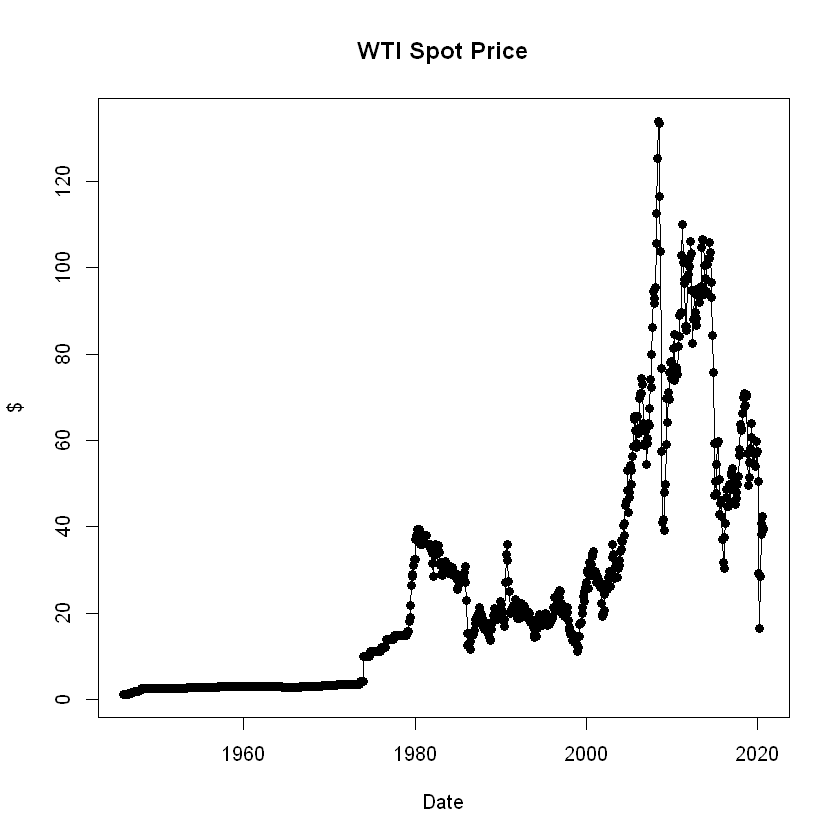

In [10]:
crude = fredr('WTISPLC')
plot(crude$date, crude$value,col='black',main='WTI Spot Price', pch=16,
    xlab='Date',ylab='$')
lines(crude$date,crude$value,col="black")

#### 9) CBOE Volatility Index
Or VIX, measures the <b>Expected Price Fluctuation</b> in the SP500 over the <b>next 30 days</b>, this index serves as a great leading indicator of percieved risk in the stock market, which serves as a benchmark of risk-reward for many market participants

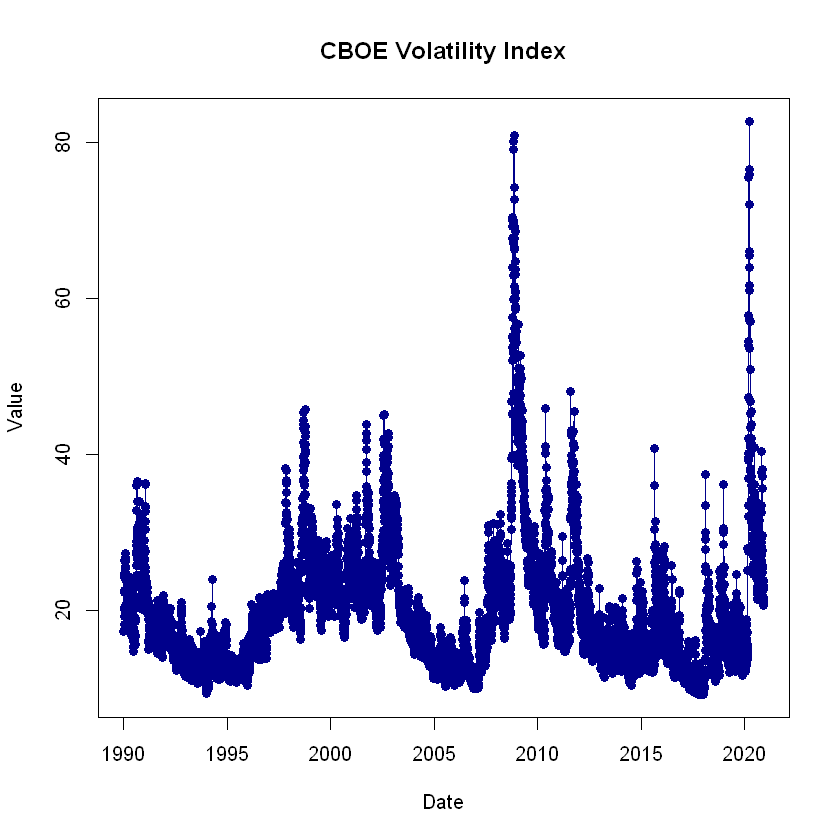

In [11]:
VIX = fredr('VIXCLS')
plot(VIX$date, VIX$value,col='darkblue',main='CBOE Volatility Index', pch=16,
    xlab='Date',ylab='Value')
lines(VIX$date,VIX$value,col="darkblue")

#### 10) Manufacturer's New Order: Durable Goods 
Manufacturer's New Orders is a direct indicator on the supply side of the economy, this index gives a good impression on the <b>near term</b> and <b>future expected consumption</b> in the economy

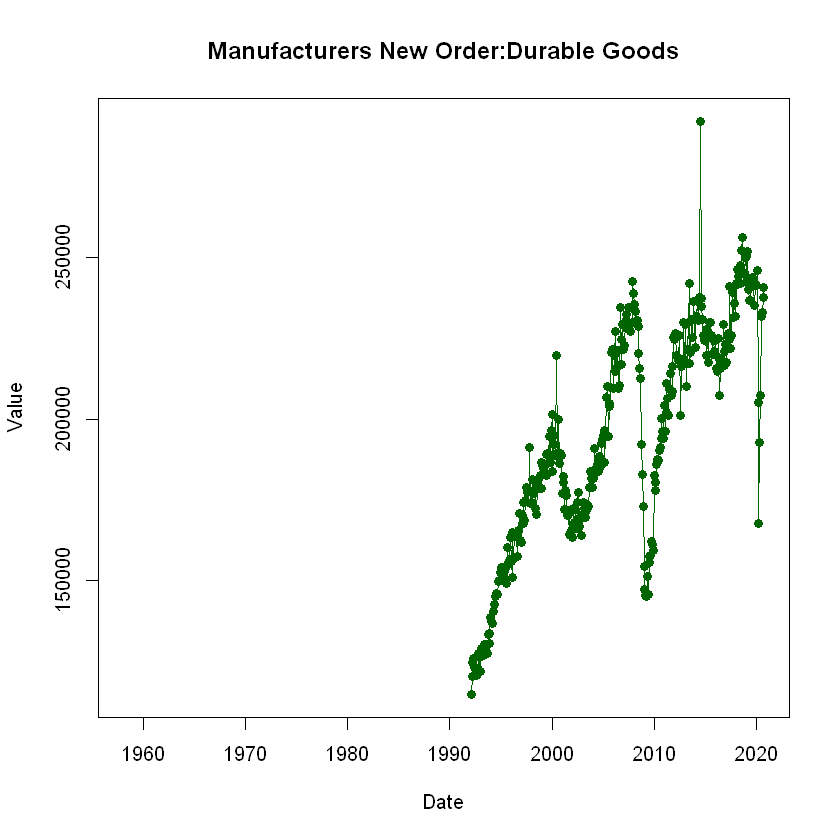

In [12]:
manuorder = fredr('DGORDER')
plot(manuorder$date, manuorder$value,col='darkgreen',main='Manufacturers New Order:Durable Goods', pch=16,
    xlab='Date',ylab='Value')
lines(manuorder$date,manuorder$value,col="darkgreen")

## Section 2 - Initial Analysis (Simple Linear Regression)
We started by curating the recession indicator so that when the economy is <b>not in recession</b>, the indicator would return <b>1</b> to make the analysis easier to understand

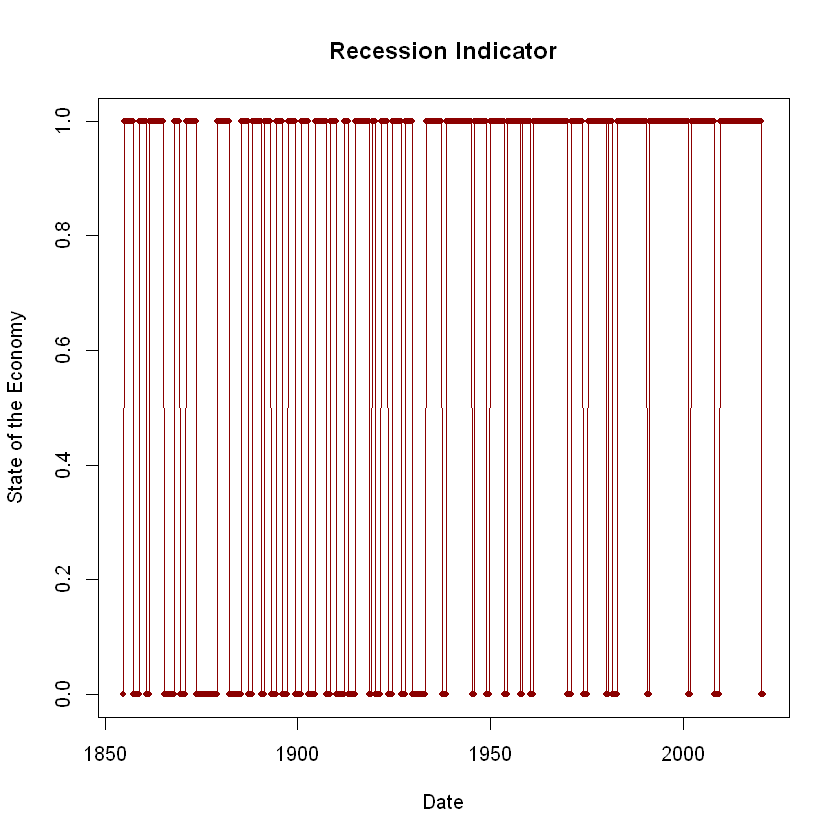

In [13]:
recession = fredr('USREC')
recession$value = recession$value - 1 
recession$value[recession$value == -1] <- 1
plot(recession$date, recession$value,col='darkred',main='Recession Indicator', pch=20,
    xlab='Date',ylab='State of the Economy')
lines(recession$date,recession$value,col="darkred")

In [14]:
##df1 yield curve
df1 = merge(recession, yieldcurve, by.x='date',by.y='date')
##df2 GDP
df2 = merge(recession,GDP, by.x='date', by.y='date')
##df3 buildingpermit
df3 = merge(recession,buildingpermit, by.x='date', by.y='date')
##df4 creditspread
df4 = merge(recession, creditspread, by.x='date', by.y='date')
##df5 private acct and publicacct
df5 = merge(merge(recession,publicacct, by.x='date', by.y='date'),privateacct,by.x='date',by.y='date')
##df6 effective federal fund rate 
df6 = merge(recession, fedfund, by.x='date', by.y='date')
## Unemployment rate 
df7 = merge(recession, unemployment, by.x='date', by.y='date')
## WTI spot price
df8 = merge(recession, crude, by.x='date', by.y='date')
## VIX level
df9 = merge(recession, VIX, by.x='date', by.y='date')
## Manufacturer's New Order, as there is no PMI index provided by FRED
df10 = merge(recession, manuorder, by.x='date', by.y='date')

In [15]:
oadf1 = subset(df1,select = c(date,value.x,value.y))
oadf2 = subset(df2,select = c(date,value.x,value.y))
oadf3 = subset(df3,select = c(date,value.x,value.y))
oadf4 = subset(df4,select = c(date,value.x,value.y))
oadf5 = subset(df5,select = c(date,value.x,value.y,value))
oadf6 = subset(df6,select = c(date,value.x,value.y))
oadf7 = subset(df6,select = c(date,value.x,value.y))
oadf8 = subset(df6,select = c(date,value.x,value.y))
oadf9 = subset(df6,select = c(date,value.x,value.y))
oadf10 = subset(df6,select = c(date,value.x,value.y))

In [16]:
names1 = c('date','recession','yieldcurve')
names2 = c('date','recession','GDP')
names3 = c('date','recession','buildingpermit')
names4 = c('date','recession','creditspread')
names5 = c('date','recession','publicacct','privateacct')
names6 = c('date','recession','fedfund')
names7 = c('date','recession','unemployment')
names8 = c('date','recession','crude')
names9 = c('date','recession','VIX')
names10 = c('date','recession','manuorder')

In [17]:
colnames(oadf1) = names1
colnames(oadf2) = names2
colnames(oadf3) = names3
colnames(oadf4) = names4
colnames(oadf5) = names5
colnames(oadf6) = names6
colnames(oadf7) = names7
colnames(oadf8) = names8
colnames(oadf9) = names9
colnames(oadf10) = names10

In [18]:
oadf1$yieldcurve = oadf1$yieldcurve * 100
oadf4$creditspread = oadf4$creditspread * 100
oadf6$fedfund = oadf6$fedfund * 100
oadf7$unemployment = oadf7$unemployment * 100

oadf1$yieldcurve.l1 =lag(oadf1$yieldcurve,1)
oadf2$GDP.l1 = lag(oadf2$GDP,1)
oadf4$creditspread.l1 = lag(oadf4$creditspread,1)

Some data refining is done here, to make the <b>Yield Curve</b>, <b>Credit Spread</b>, <b>Effective Federal Fund Rate</b>and <b>Unemployment Rate</b> to show in basis points 

Then we choose to run <b>Simple Linear Regression</b>on all ten datasets <b>individually</b> against the recovery indicator. This is partly due to the varing time range afforded by these datasets, we do not wish to compromise on the accuracy of the outcome by cutting down on the size of every datasets

In [19]:
mlr1 = lm(recession ~ yieldcurve.l1 + yieldcurve, data = oadf1)
mlr2 = lm(recession ~ GDP + GDP.l1, data = oadf2)
mlr3 = lm(recession ~ buildingpermit, data = oadf3)
mlr4 = lm(recession ~ creditspread.l1 + creditspread, data = oadf4)
mlr5 = lm(recession ~ publicacct + privateacct,data = oadf5)
mlr6 = lm(recession ~ fedfund,data = oadf6)
mlr7 = lm(recession ~ unemployment,data = oadf7)
mlr8 = lm(recession ~ crude,data = oadf8)
mlr9 = lm(recession ~ VIX,data = oadf9)
mlr10 = lm(recession ~ manuorder,data = oadf10)

In [20]:
result1 = stargazer(mlr1, type='text', title='recession v yieldcurve',single.row=TRUE,
          ci = TRUE, ci.level=0.95)
result2 = stargazer(mlr2, type='text', title='recession v GDP',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)
result3 = stargazer(mlr3, type='text', title='recession v buildingpermit',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)
result4 = stargazer(mlr4, type='text', title='recession v creditspread',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)
result5 = stargazer(mlr5, type='text', title='recession v public v private account',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)
result6 = stargazer(mlr6, type='text', title='Effective Federal Fund Rate',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)
result7 = stargazer(mlr7, type='text', title='Unemployment Rate',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)
result8 = stargazer(mlr8, type='text', title='WTI Spot Price',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)
result9 = stargazer(mlr9, type='text', title='VIX',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)
result10 = stargazer(mlr10, type='text', title='Manufacturere New Order',single.row=TRUE,
                    ci = TRUE, ci.level=0.95)



recession v yieldcurve
                        Dependent variable:    
                    ---------------------------
                             recession         
-----------------------------------------------
yieldcurve.l1         0.002*** (0.001, 0.003)  
yieldcurve          -0.002*** (-0.003, -0.001) 
Constant              0.880*** (0.827, 0.933)  
-----------------------------------------------
Observations                    466            
R2                             0.037           
Adjusted R2                    0.032           
Residual Std. Error      0.313 (df = 463)      
F Statistic           8.779*** (df = 2; 463)   
Note:               *p<0.1; **p<0.05; ***p<0.01

recession v GDP
                        Dependent variable:     
                    ----------------------------
                             recession          
------------------------------------------------
GDP                  0.0003*** (0.0001, 0.001)  
GDP.l1              -0.0003*** (-0.001, -0

After running the Simple Linear Regression, we <b>failed to reject</b> the null hypothesis that the indicator is uncorrelated with the state of the economy on <b>four out of the ten</b> indicators.

<b>Yield Curve, Building Permit, Effective Fed Fund Rate, Unemployment Rate, WTI Spot,VIX and Manufactuere's New Orders</b> all proved to have statistical significance and have correlation to the state of recovery

With the the surviving indicators, we are ready to run a <b>Multi-linear Regression Model</b> 

In [21]:
buildingpermit$value = buildingpermit$value/100
yieldcurve$value = yieldcurve$value * 100
fedfund$value = fedfund$value * 100
keepdf =merge(merge(recession, yieldcurve, by.x='date',by.y='date'),merge(buildingpermit,VIX, by.x='date',by.y='date'),by.x='date',by.y='date')
keepdf2 = merge(merge(fedfund,unemployment,by.x='date',by.y='date'),crude, by.x='date', by.y='date')
masterdf = merge(keepdf, keepdf2,by.x='date', by.y='date')

masterdf1 = subset(masterdf,select = c(date,value.x.x,value.y.x,value.x.y,value.y.y,value.x,value.y,value))
masternames = c('date', 'recovery','yieldcurve','buildingpermit','VIX','fedfund','unemployment','crude')
colnames(masterdf1) = masternames

model =lm(recovery ~ yieldcurve + buildingpermit + VIX + fedfund + unemployment + crude,
          data = masterdf1)
stargazer(model, type='text', title='Recovery Model',single.row=TRUE,
          ci = TRUE, ci.level=0.95)


Recovery Model
                        Dependent variable:    
                    ---------------------------
                             recovery          
-----------------------------------------------
yieldcurve           0.0001 (-0.0003, 0.0005)  
buildingpermit        -0.001 (-0.012, 0.011)   
VIX                 -0.019*** (-0.024, -0.014) 
fedfund              -0.0001 (-0.0003, 0.0001) 
unemployment          -0.018 (-0.047, 0.010)   
crude                 -0.001 (-0.003, 0.0004)  
Constant              1.460*** (1.104, 1.816)  
-----------------------------------------------
Observations                    235            
R2                             0.268           
Adjusted R2                    0.249           
Residual Std. Error      0.268 (df = 228)      
F Statistic           13.909*** (df = 6; 228)  
Note:               *p<0.1; **p<0.05; ***p<0.01


In [22]:
rprobability = model$coefficients[1] + model$coefficients[2]*69 + model$coefficients[3]* 15.44 + model$coefficients[4]*26.7 + model$coefficients[5]*9 + model$coefficients[6]*6.9 + model$coefficients[7]*39.4
rprobability

(Intercept) 
   0.769313

As indicated above, the <b>MLR</b> predict there is <b>76.93%</b> probability the economy will be in recovery by the next month 

With this as a reference metric, we can move on to the <b>Logit Model</b> 

## Section 3 - Logit Model
At this point, all the datasets are merged into one master dataframe, <b>Logit Model</b> is very easy to run

In [23]:
mastermodel = glm(recovery ~ yieldcurve + buildingpermit + VIX + fedfund + unemployment + crude,data = masterdf1, family = 'binomial')
stargazer(mastermodel,type='text',title ='Logit Model', single.row = TRUE,
          ci=TRUE,ci.level=0.95,digits =4)


Logit Model
                       Dependent variable:     
                  -----------------------------
                            recovery           
-----------------------------------------------
yieldcurve          -0.0014 (-0.0080, 0.0051)  
buildingpermit      -0.1191 (-0.3573, 0.1190)  
VIX               -0.2067*** (-0.2876, -0.1258)
fedfund            -0.0041* (-0.0085, 0.0002)  
unemployment        -0.3732 (-0.8825, 0.1362)  
crude             -0.0327** (-0.0619, -0.0034) 
Constant          13.8430*** (4.4149, 23.2712) 
-----------------------------------------------
Observations                   235             
Log Likelihood              -52.6600           
Akaike Inf. Crit.           119.3201           
Note:               *p<0.1; **p<0.05; ***p<0.01


With the outcome from the stargazer, we are able to construct the following function

In [24]:
r = exp(mastermodel$coefficients[1]
        +mastermodel$coefficients[2]*69
        +mastermodel$coefficients[3]*15.44
        +mastermodel$coefficients[4]*26.7
        +mastermodel$coefficients[5]*9
        +mastermodel$coefficients[6]*6.9
        +mastermodel$coefficients[7]*39.4)

logp = r/(1+r)
logp

(Intercept) 
  0.9232779

The function indicates that the <b>Logit Model</b>, based on the most recent month's data from the <b>Six Indicators</b>
the probability of recovery in the next month is <b>92.58%</b>

What is left to do is to construct a <b>Confusion Matrix</b> with both training and test set to see the 
- <b>Accuracy</b>
- <b>Sensitivity(TPR):</b> samples that were correctly classified as recession
- <b>Specificity(TNR):</b> percentage of the recovery samples that are correctly identified 
- <b>False Positive Rate:</b> (1-Sensitivity) the percentage of the recovery samples that were incorrectly classified as recession

of the above model

In [25]:
set.seed(632)
split_log = sample.split(masterdf1,SplitRatio=0.7)
train = subset(masterdf1,split_log==T)
test = subset(masterdf1,split_log==F)
mod_log = glm(recovery ~ yieldcurve + buildingpermit + VIX + fedfund + unemployment + crude, data = train, family='binomial')
result = predict(mod_log,newdata = test, type = 'response')

confm = table(result>0.7,test$recovery)
confm

accuracy = sum(diag(confm))/sum(confm)*100
sens = confm[1]/(confm[2]+confm[1])
spec = confm[4]/(confm[3]+confm[4])

round(accuracy,2)
round(sens*100,2)
round(spec*100,2)

       
         0  1
  FALSE  4  5
  TRUE   3 74

[1] 90.7

[1] 57.14

[1] 93.67

As indicated above, the <b> Logit Model</b> based on the <b>Six Indicators</b>, has:
- <b>an Accuracy of 90.69%</b>
- <b>True Positive Rate of 57.14%</b>
- <b>True Negative Rate</b> (Specificity) <b>of 93.67%</b>
- <b>False Positive Rate of 6.33%</b> (1-Specificity)
<br>
<br>
based on the <b>Discriminant Threshold</b> that the economy is <b> in the state of recovery 70% of the time</b>

<br>
<br>
Next, we reduced the threshold to the <b>Population Mean</b> of the test set

In [26]:
mean = mean(test$recovery)
confm1 = table(result>mean,test$recovery)
confm1

accuracy1 = sum(diag(confm1))/sum(confm1)
sens1 = confm1[1]/(confm1[2]+confm1[1])*100
spec1 = confm1[4]/(confm1[3]+confm1[4])*100

round(accuracy1*100,2)
round(sens1,2) 
round(spec1,2)

table(masterdf1$recovery)
round(233/(30+233)*100,2)

       
         0  1
  FALSE  6 23
  TRUE   1 56

[1] 72.09

[1] 85.71

[1] 70.89


  0   1 
 30 233 

[1] 88.59

In the <b>Threshold = Mean</b> case, the Model has: 
- <b>an Accuracy of 72.09%</b>
- <b>True Positive Rate of 85.71%</b>
- <b>True Negative Rate</b> (Specificity) <b>of 70.89%</b>
- <b>False Positive Rate of 29.11%</b> (1-Specificity)

<br>
Though, when compared to the <b>Recovery Indicator</b> itself - which has an <b>Accuracy of 88.59%</b> - our model lacks <b>16%</b> in accuracy, it still trumps the <b>50%</b> prbability you get from random guessing 

## Section 4 - Conclusion

#### Risk and Problems
The recovery indicator is binary, in recession and not in recession, which makes our recovery indicator binary<br> 
Naturally, the state of the economy is not binary.<br>
There are cycles. The <b>periods leading up to a recession</b> and <b>growth/expansion periods</b> <b>SHOULD NOT</b> be classified as recovery periods.<br>
We weren't able to find an optimal way to address this problem. 

Some of the datasets are prone to <b>exogenous risks</b> outside of the notion of recovery and/or recession.<br>
For example, the VIX index may subject to market participant risks, WTI to legal and political risks, durable goods to geopolitical risks, the interest rate to policy risk, to name a few. 

#### What We've Learned
In the process of building this model, we learned that many theoritical relationship that seemed intuitive may break down with real world data.<br> Building this model has made us to rethink a lot of our non-data-analytics formed opinions and reimagine the way we could potentially approach our future projects. 